# Análisis: seguro de vehículos


Una empresa de seguros de salud quiere ofrecer a sus antiguos clientes un nuevo seguro de vehículos. Necesita nuestro servicio para crear un modelo que prediga si un cliente estaría interesado en este nuevo seguro.

Tenemos un conjunto de datos con los siguientes valores:

| Variable | Definición |
| --- | --- |
| id | Identificador único |
| Gender | Género del cliente (M/F) |
| Age | Edad del cliente |
| Driving_License | El cliente tiene carnet de conducir (1/0) |
| Region_Code | Código de la región del cliente |
| Previously_Insured | El cliente ya tiene seguro de coche (1/0) |
| Vehicle_Age | Años del vehículo |
| Vehicle_Damage | El cliente ha sufrido daños en su vehículo anteriormente (1/0) |
| Annual_Premium | Cantidad a pagar por el nuevo seguro |
| Plocy_Sales_Channel | Canal por el que se localiza al cliente (e-mail, teléfono, en persona, etc) |
| Vintage | Número de días del cliente con la compañía |
| Response | Respuesta si o no (1/0) |

### Problema de clasificación

## Importando y dividiendo Dataset

Importamos librerías necesarias y cargamos los dataset de entrenamiento y prueba desde la carpeta /res

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv('../res/train.csv')
x = train.iloc[:, 1:-1] # Training Dataset without dependient variable and index (pandas index = dataset index - 1)
y = train.iloc[:, -1] # Training Dependient variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) # Train and test set split

# test_final = pd.read_csv('../res/test_final.csv').iloc[:, 1:] # Test Dataset variable and index (pandas index = dataset index - 1)

## Pre-análisis

Investigamos la estructura del dataset

A continuación se muestra el dataset completo:

In [2]:
display(train)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


Comprobamos si existe algún valor nulo:

In [3]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Comprobamos el tipo de dato de cada columna:

In [4]:
dtypes_train = train.dtypes
display(dtypes_train)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Previsualización

En este apartado vamos a analizar visualmente el dataset para así poder analizar de una forma más sencilla como se comportan los clientes ante sus diferentes condiciones. Este apartado se divide en:

- Análisis de variables discretas
- Análisis de variables continuas
- Análisis de comparación entre variables

### Análisis de variables discretas

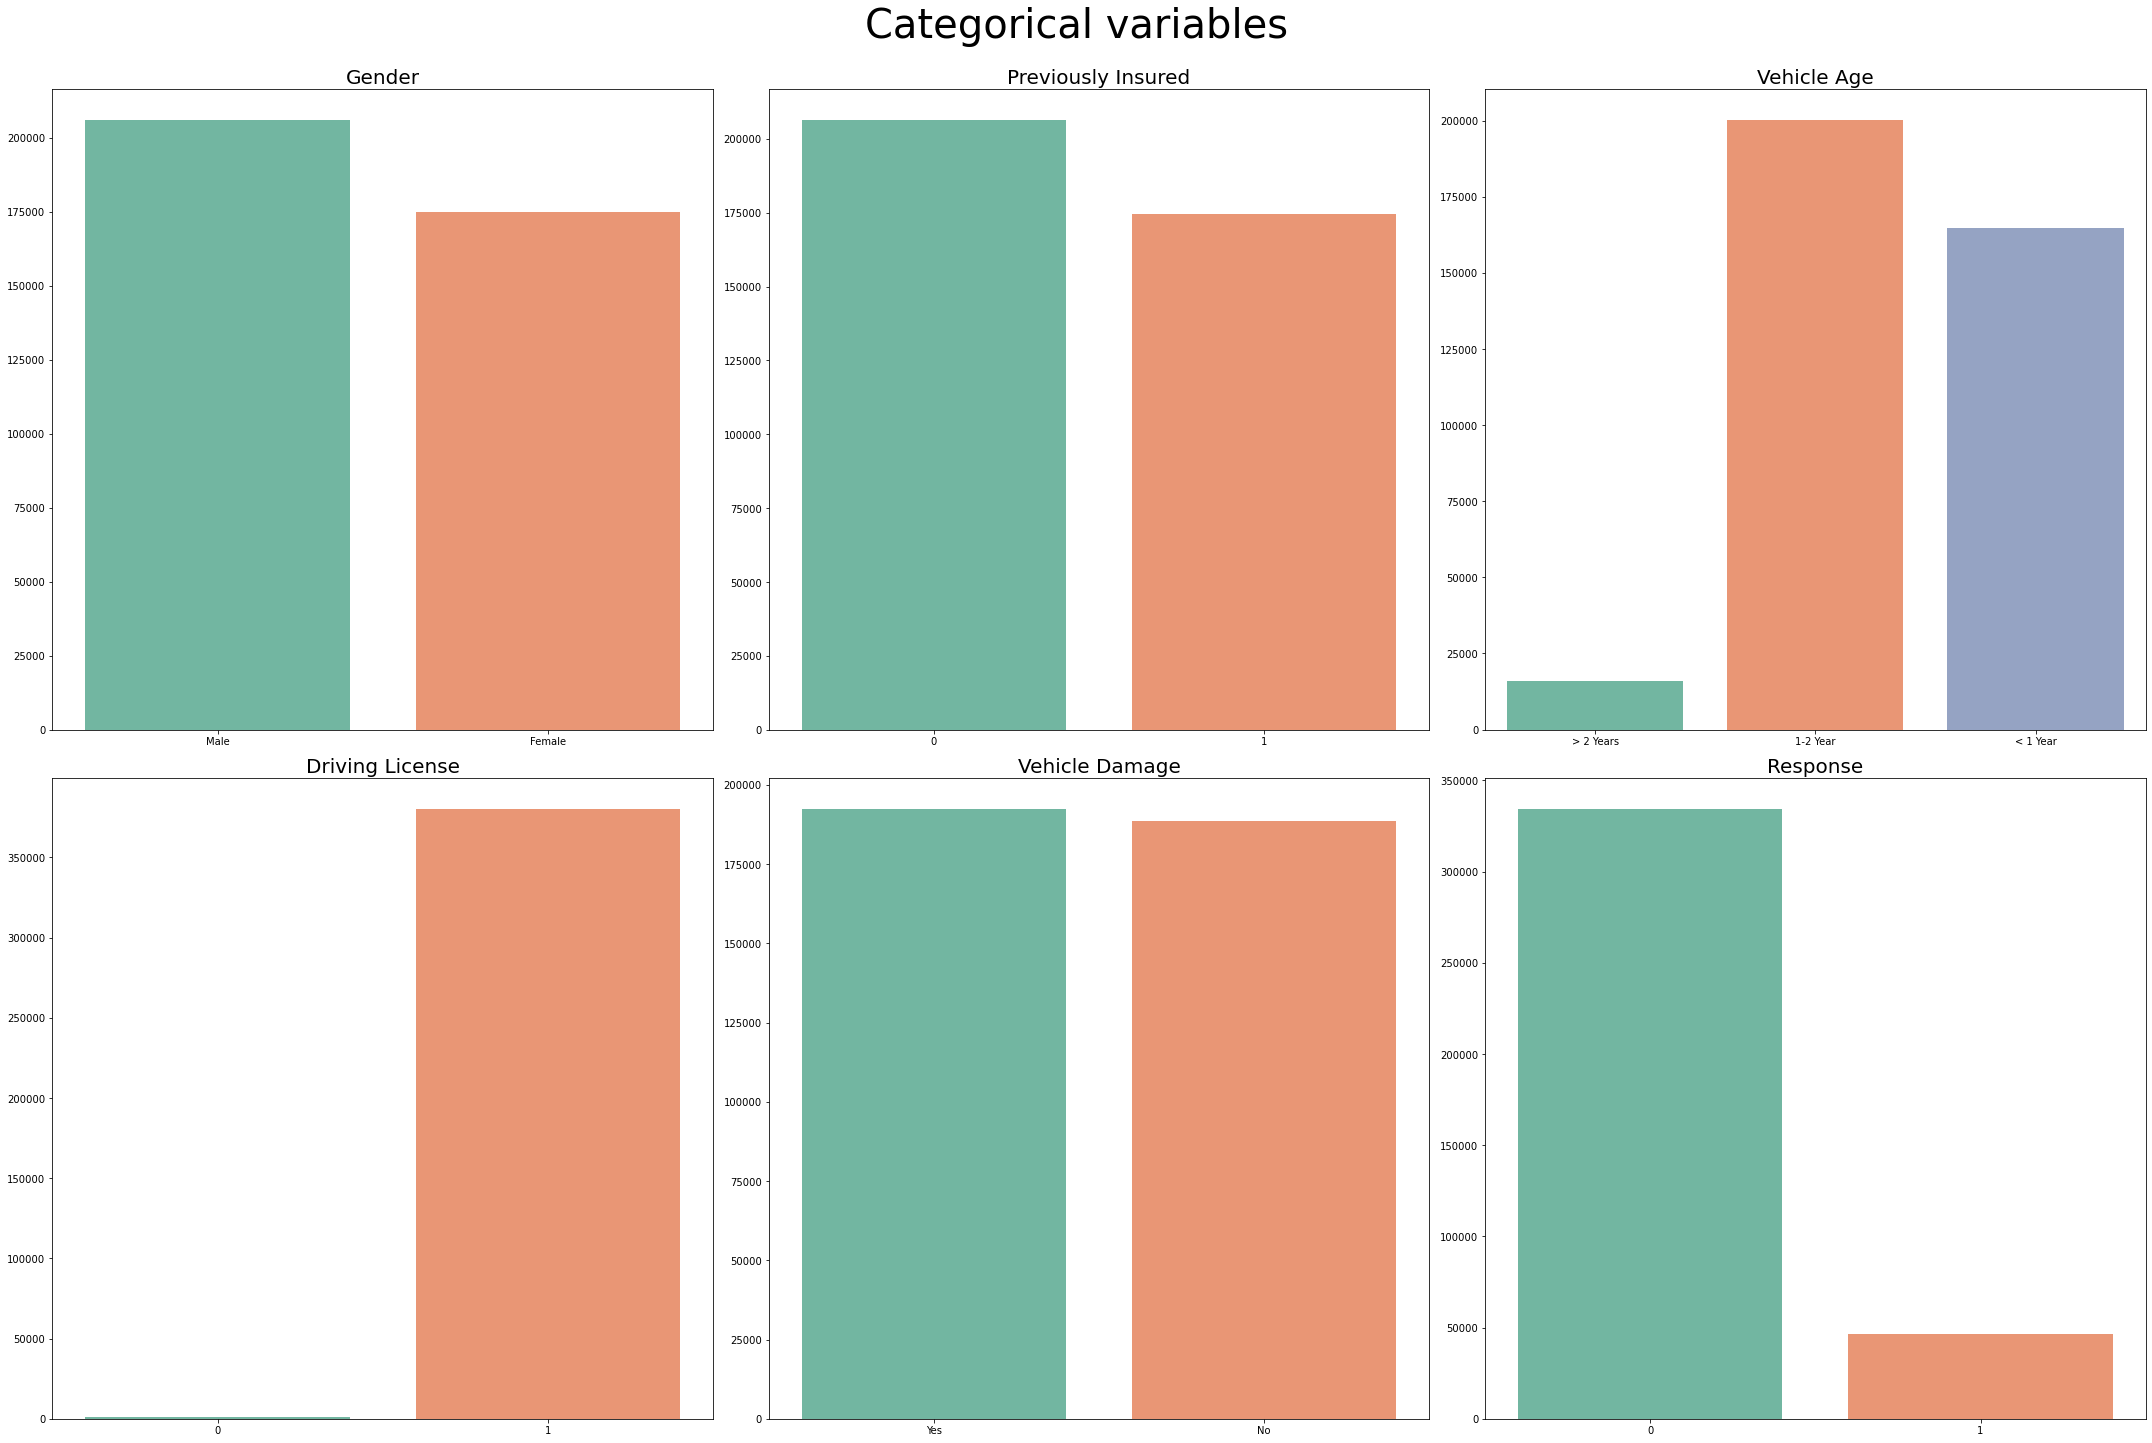

In [5]:
fig, ax = plt.subplots(2, 3, figsize = (30, 20))

# Gender plot
g_gender = sns.countplot(
    data = train,
    x = 'Gender',
    palette = sns.color_palette('Set2'),
    ax = ax[0, 0]
)

# Driving License plot
g_driving_license = sns.countplot(
    data = train,
    x = 'Driving_License',
    palette = sns.color_palette('Set2'),
    ax = ax[1, 0]
)

# Previously insured plot
g_previously_insured = sns.countplot(
    data = train,
    x = 'Previously_Insured',
    palette = sns.color_palette('Set2'),
    ax = ax[0, 1]
)

# Vehicle damage plot
g_damage = sns.countplot(
    data = train,
    x = 'Vehicle_Damage',
    palette = sns.color_palette('Set2'),
    ax = ax[1, 1]
)

# Vehicle Age plot
g_vehicle_age = sns.countplot(
    data = train,
    x = 'Vehicle_Age',
    palette = sns.color_palette('Set2'),
    ax = ax[0, 2]
)

# Response plot
g_response = sns.countplot(
    data = train,
    x = 'Response',
    palette = sns.color_palette('Set2'),
    ax = ax[1, 2]
)

# Titles
ax[0, 0].set_title('Gender', fontsize=20)
ax[1, 0].set_title('Driving License', fontsize=20)
ax[0, 1].set_title('Previously Insured', fontsize=20)
ax[1, 1].set_title('Vehicle Damage', fontsize=20)
ax[0, 2].set_title('Vehicle Age', fontsize=20)
ax[1, 2].set_title('Response', fontsize=20)

# Delete x and y labels
for ax in ax.reshape(-1): 
  ax.set_xlabel(None)
  ax.set_ylabel(None)

# Super title
fig.suptitle('Categorical variables', size = '40', y = 1.0)

plt.tight_layout() # Plots fit the fig area
plt.show()
plt.close()

- Género: 
- Carnet de conducir:
- Previamente asegurado:
- Daños en el vehículo: 
- Años del vehículo: 
- Response: 

### Análisis de variables continuas

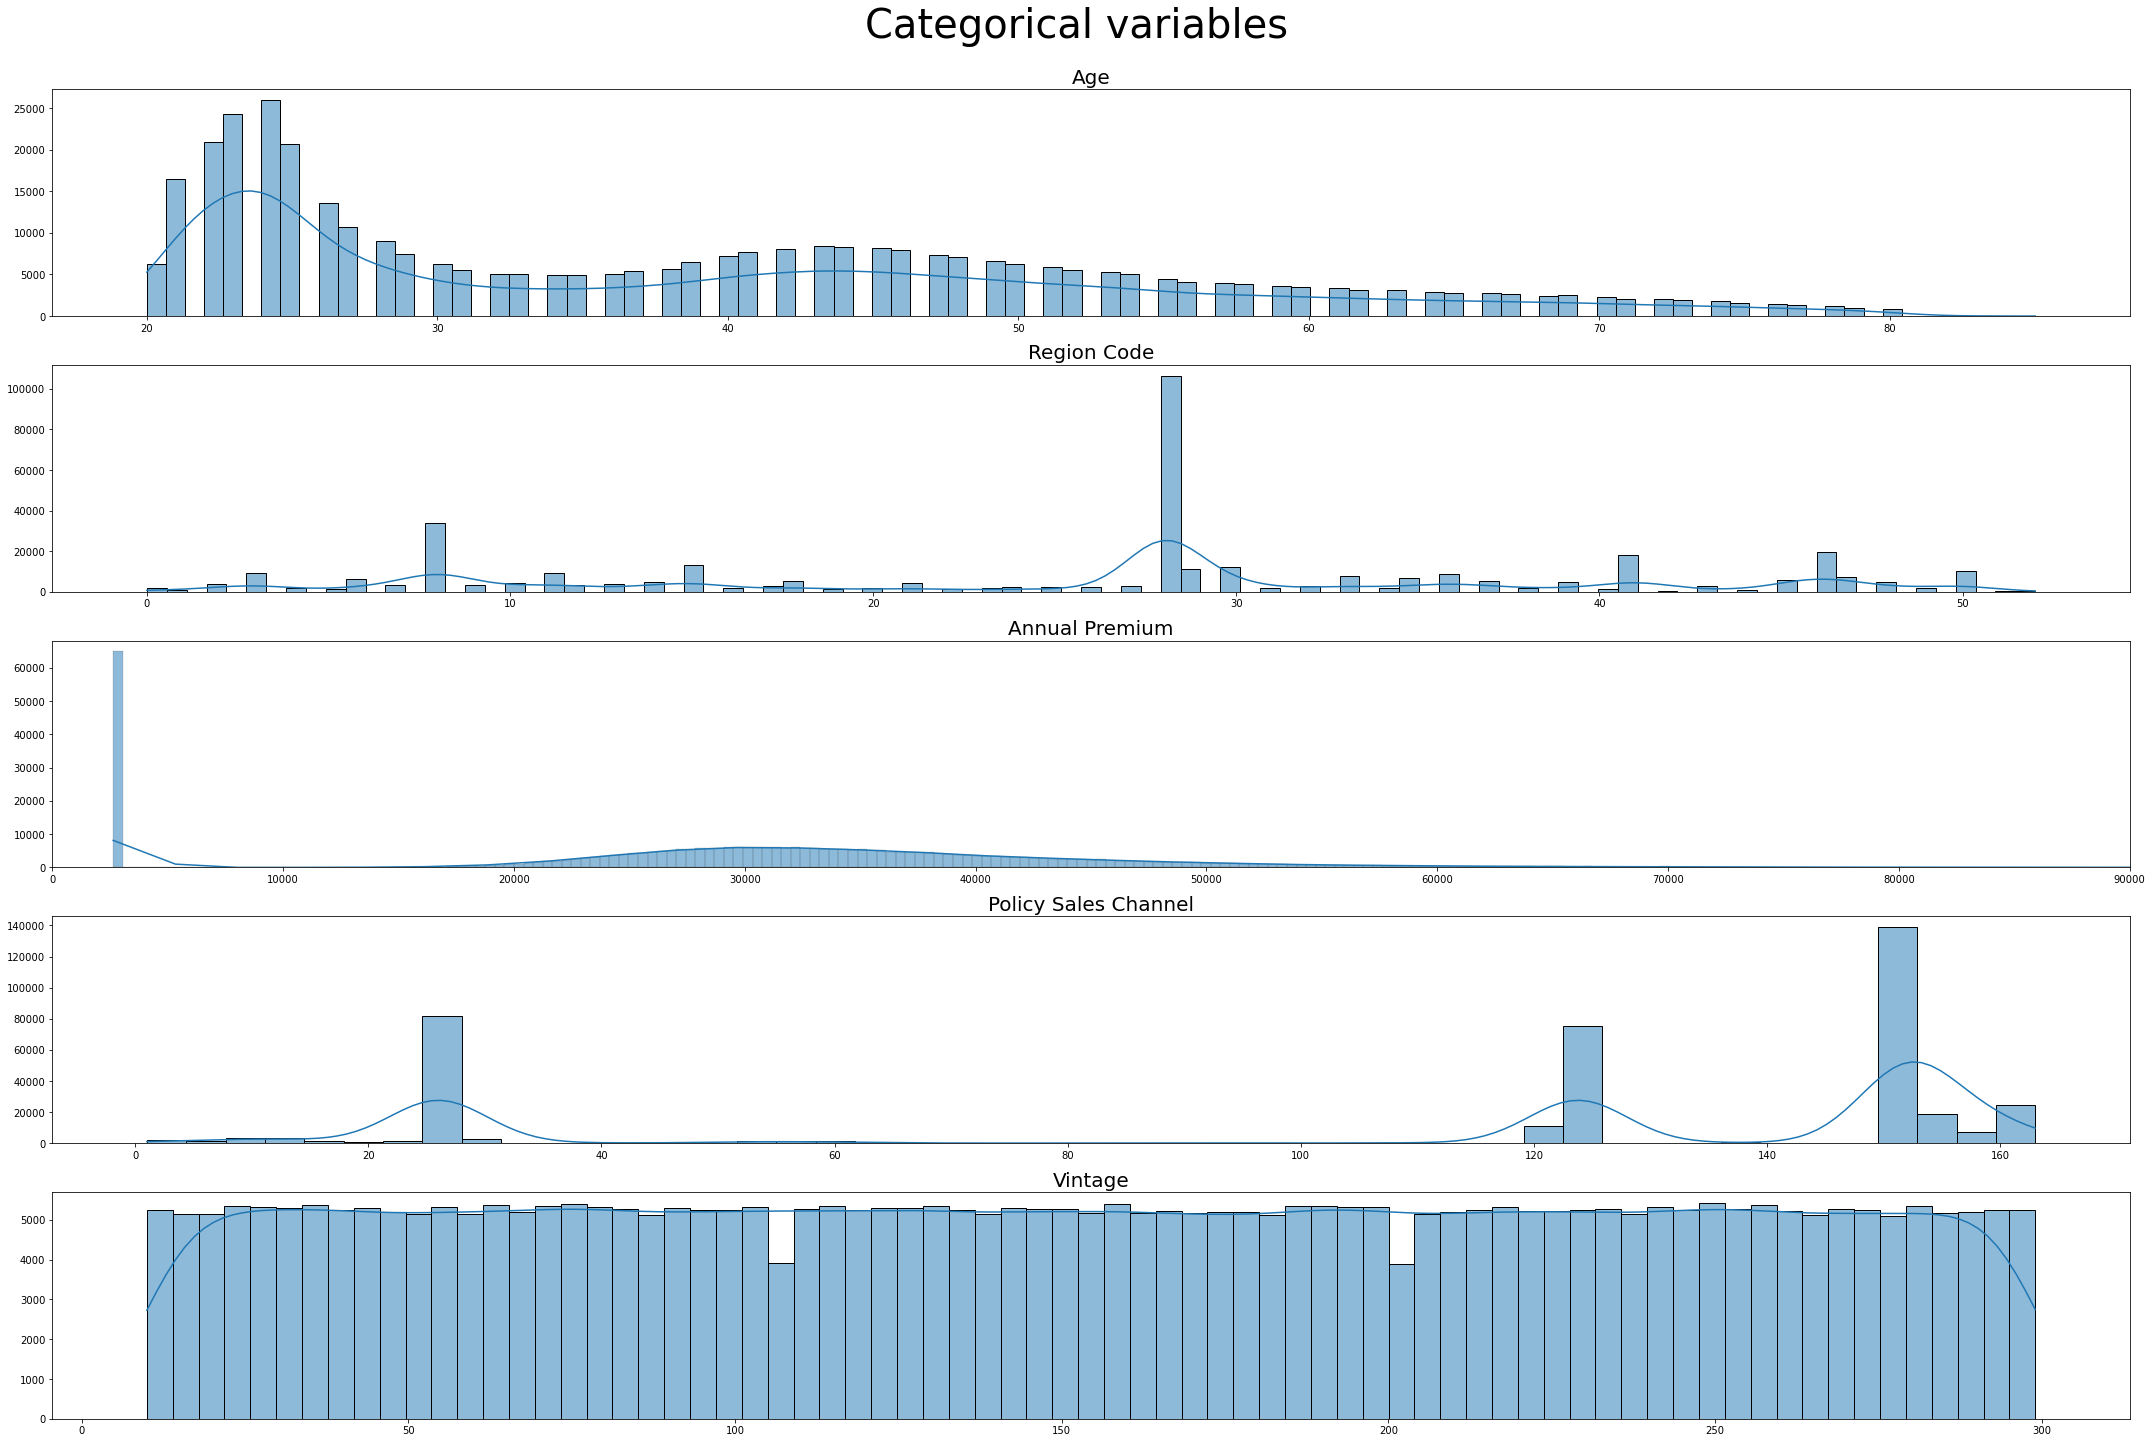

In [6]:
fig, ax = plt.subplots(5, 1, figsize = (30, 20))

# Age plot
g_edad = sns.histplot(
    data = train,
    x = 'Age',
    kde=True,
    ax = ax[0]
)

# Region Code plot
g_region = sns.histplot(
    data = train,
    x = 'Region_Code',
    kde=True,
    ax = ax[1]
)

# Premium annual plot
g_premium_anual = sns.histplot(
    data = train,
    x = 'Annual_Premium',
    kde=True,
    ax = ax[2]
)

# Policy sales channel plot
g_policy_sales_channel = sns.histplot(
    data = train,
    x = 'Policy_Sales_Channel',
    kde=True,
    ax = ax[3]
)

# Vintage plot
g_vintage = sns.histplot(
    data = train,
    x = 'Vintage',
    kde=True,
    ax = ax[4]
)

# Titles
ax[0].set_title('Age', fontsize=20)
ax[1].set_title('Region Code', fontsize=20)
ax[2].set_title('Annual Premium', fontsize=20)
ax[3].set_title('Policy Sales Channel', fontsize=20)
ax[4].set_title('Vintage', fontsize=20)

# Set x ticks limit to premium annual due to its nonuniform distribution
ax[2].set_xlim(0, 90000)

# Delete x and y label
for ax in ax.reshape(-1): 
  ax.set_xlabel(None)
  ax.set_ylabel(None)

# Super title
fig.suptitle('Categorical variables', size = '40', y = 1.0)

plt.tight_layout()  # Plots fit the fig area
plt.show()
plt.close()

- Edad:
- Región:
- Premium anual:
- Canales de comuncación: 
- Vintage: 

### Comparación entre variables

Podemos considerar una de las variables más decisivas el hecho de haber recibido daños en el vehículo anteriormente y los años que tenga el vehiculo. Vamos a dividir además estas dos variables según el género del cliente. 
#### Comparamos las siguientes variables:

- Años del vehículo
- Daños anteriores en el vehículo
- Género
- Respuesta

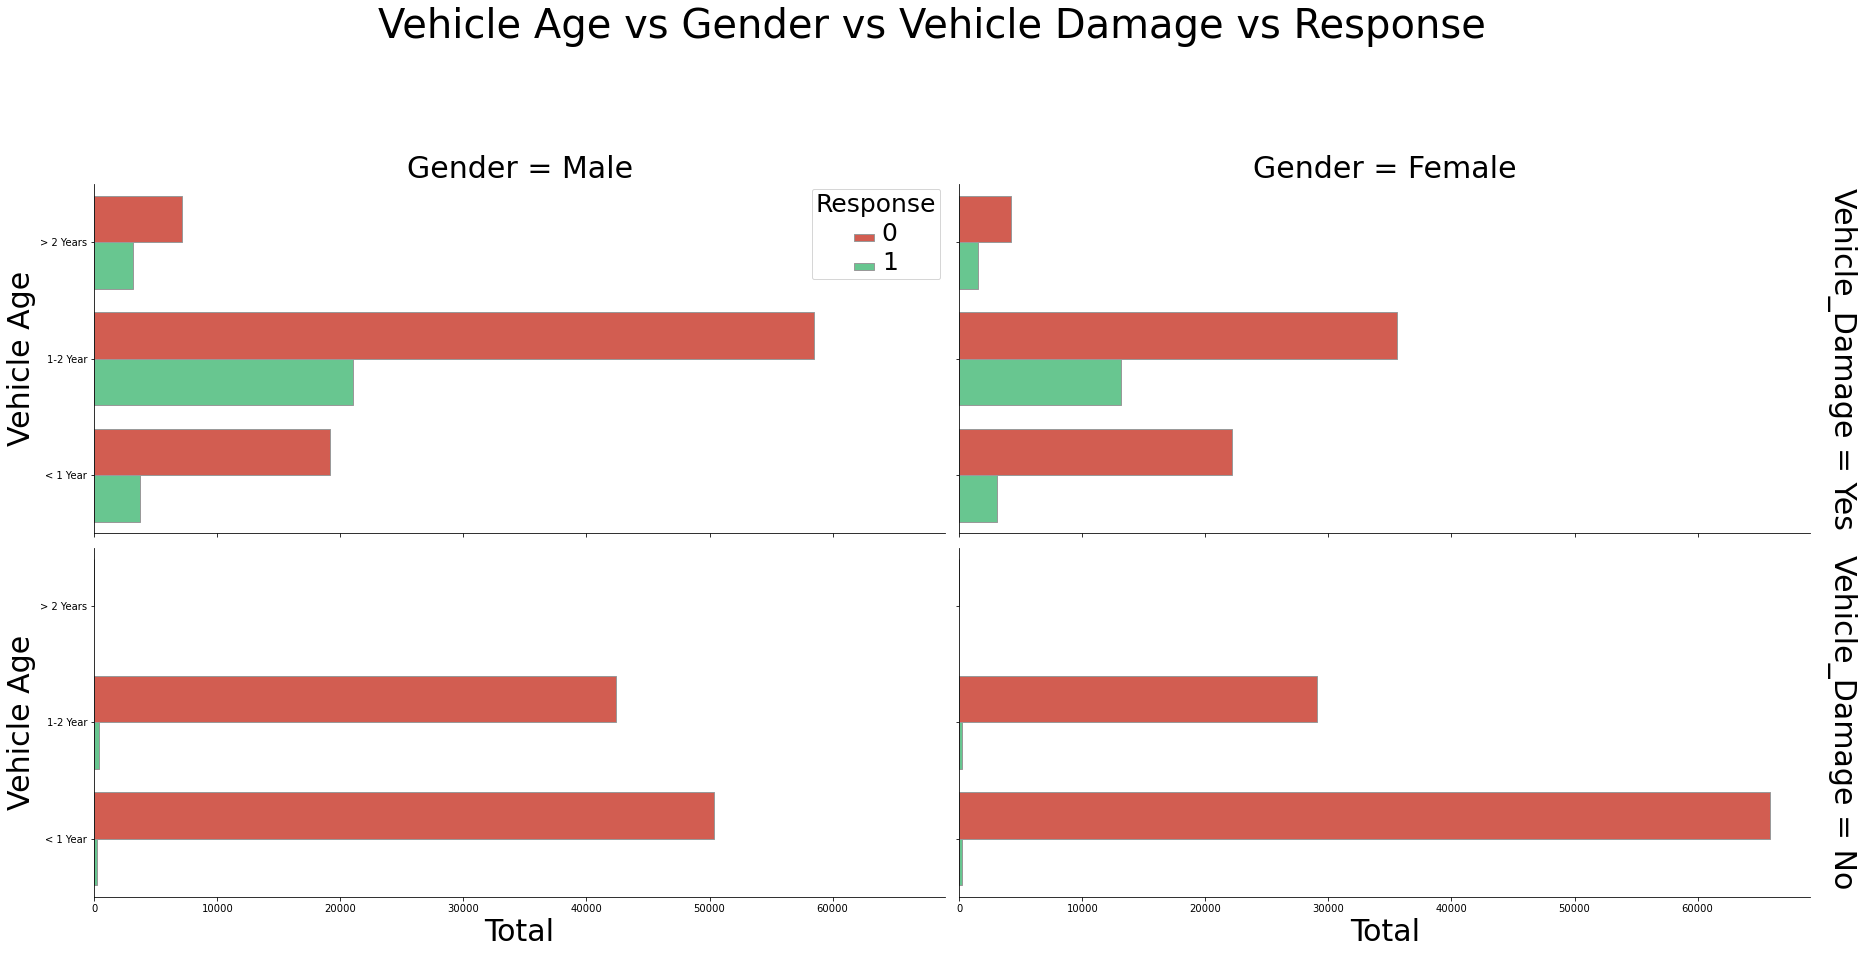

In [9]:
# Vehicle age vs Gender vs Vehicle Damage vs Response plot
g_vage_gender_vdama = sns.catplot(
    data = train,
    y = 'Vehicle_Age', hue = 'Response', col = 'Gender', row = 'Vehicle_Damage',    
    kind = 'count', height=6, aspect=13/6,    
    legend = True,  
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    edgecolor = '.6',
    margin_titles = True,
    legend_out = False)

# Title axis & super title  
g_vage_gender_vdama.set_titles(size = '30')
g_vage_gender_vdama.set_axis_labels("Total", "Vehicle Age", size = '30')
g_vage_gender_vdama.fig.suptitle('Vehicle Age vs Gender vs Vehicle Damage vs Response', size = '40', y = 1.1)
plt.setp(g_vage_gender_vdama._legend.get_texts(), fontsize=25)
plt.setp(g_vage_gender_vdama._legend.get_title(), fontsize=25)

plt.tight_layout() # Plots fit the fig area
plt.show()
plt.close()

#### Veamos como se comportan los clientes que ya tienen seguro y no tienen carnet de conducir:

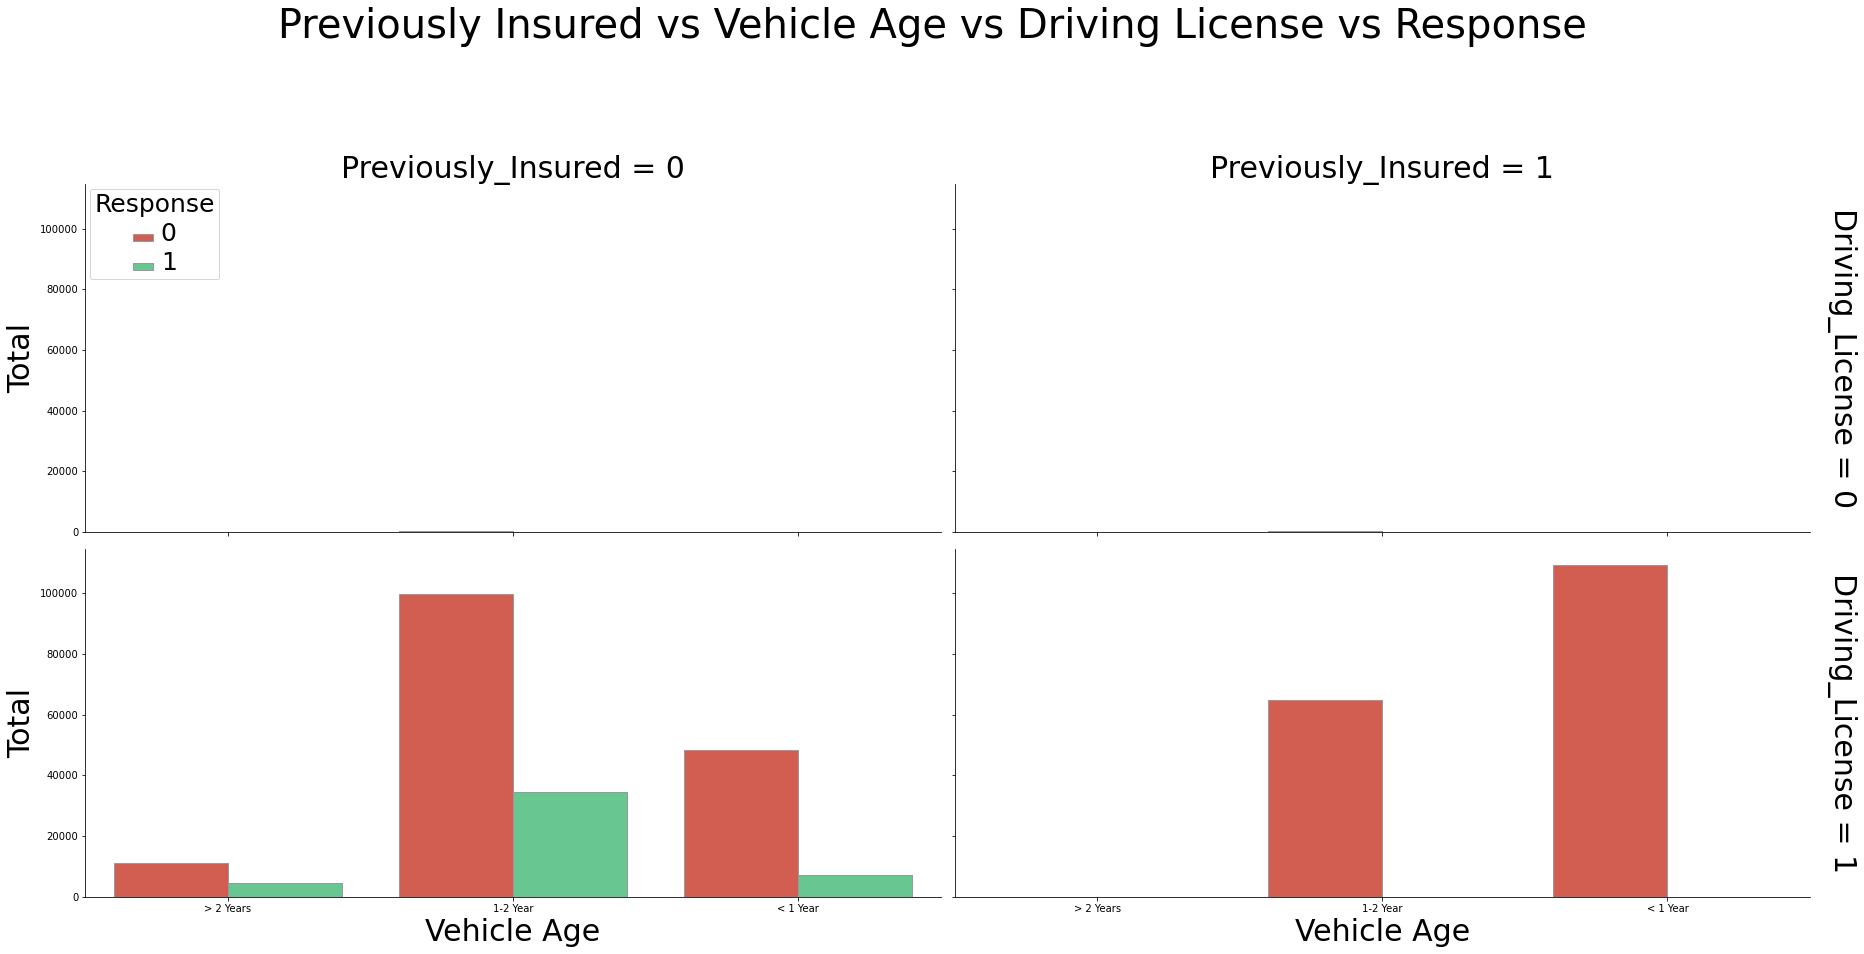

In [11]:
# Previously Insured vs Vehicle Age vs Driving License Plot
g_pins_vdama = sns.catplot(
    data = train,
    hue = 'Response', x = 'Vehicle_Age', col = 'Previously_Insured', row = 'Driving_License',    
    kind = 'count', height=6, aspect=13/6,
    legend = True,  
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    edgecolor = '.6',
    margin_titles = True,
    legend_out = False
)

# Title axis & super title  
g_pins_vdama.set_titles(size = '30')
g_pins_vdama.set_axis_labels("Vehicle Age", "Total", size = '30')
g_pins_vdama.fig.suptitle('Previously Insured vs Vehicle Age vs Driving License vs Response', size = '40', y = 1.1)
plt.setp(g_pins_vdama._legend.get_texts(), fontsize=25)
plt.setp(g_pins_vdama._legend.get_title(), fontsize=25)

plt.tight_layout()  # Plots fit the fig area
plt.show()
plt.close()

Podemos observar como prácticamente ningún cliente ha respondido de forma afirmativa cuando su vehiculo no ha recibido daños anteriormente. Esta variable (**Vehicle_Damage**) puede ser un discriminador sencillo y rápido a la hora de determinar la respuesta del cliente.

Por otro lado, las dos otras variables no parecen afectar demasiado en la decisión. Si bien, aunque no de forma clara, observamos alguna reticiencia en los clientes con vehiculos de menos de un año.

Algo que podemos observar de esta visualización es que el dataset no posee muchos datos sobre vehiculos no dañados mayores de dos años.

#### En el siguiente gráfico analizamos el comportamiento de los clientes por:

- Edad
- Localización
- Canal de comunicación

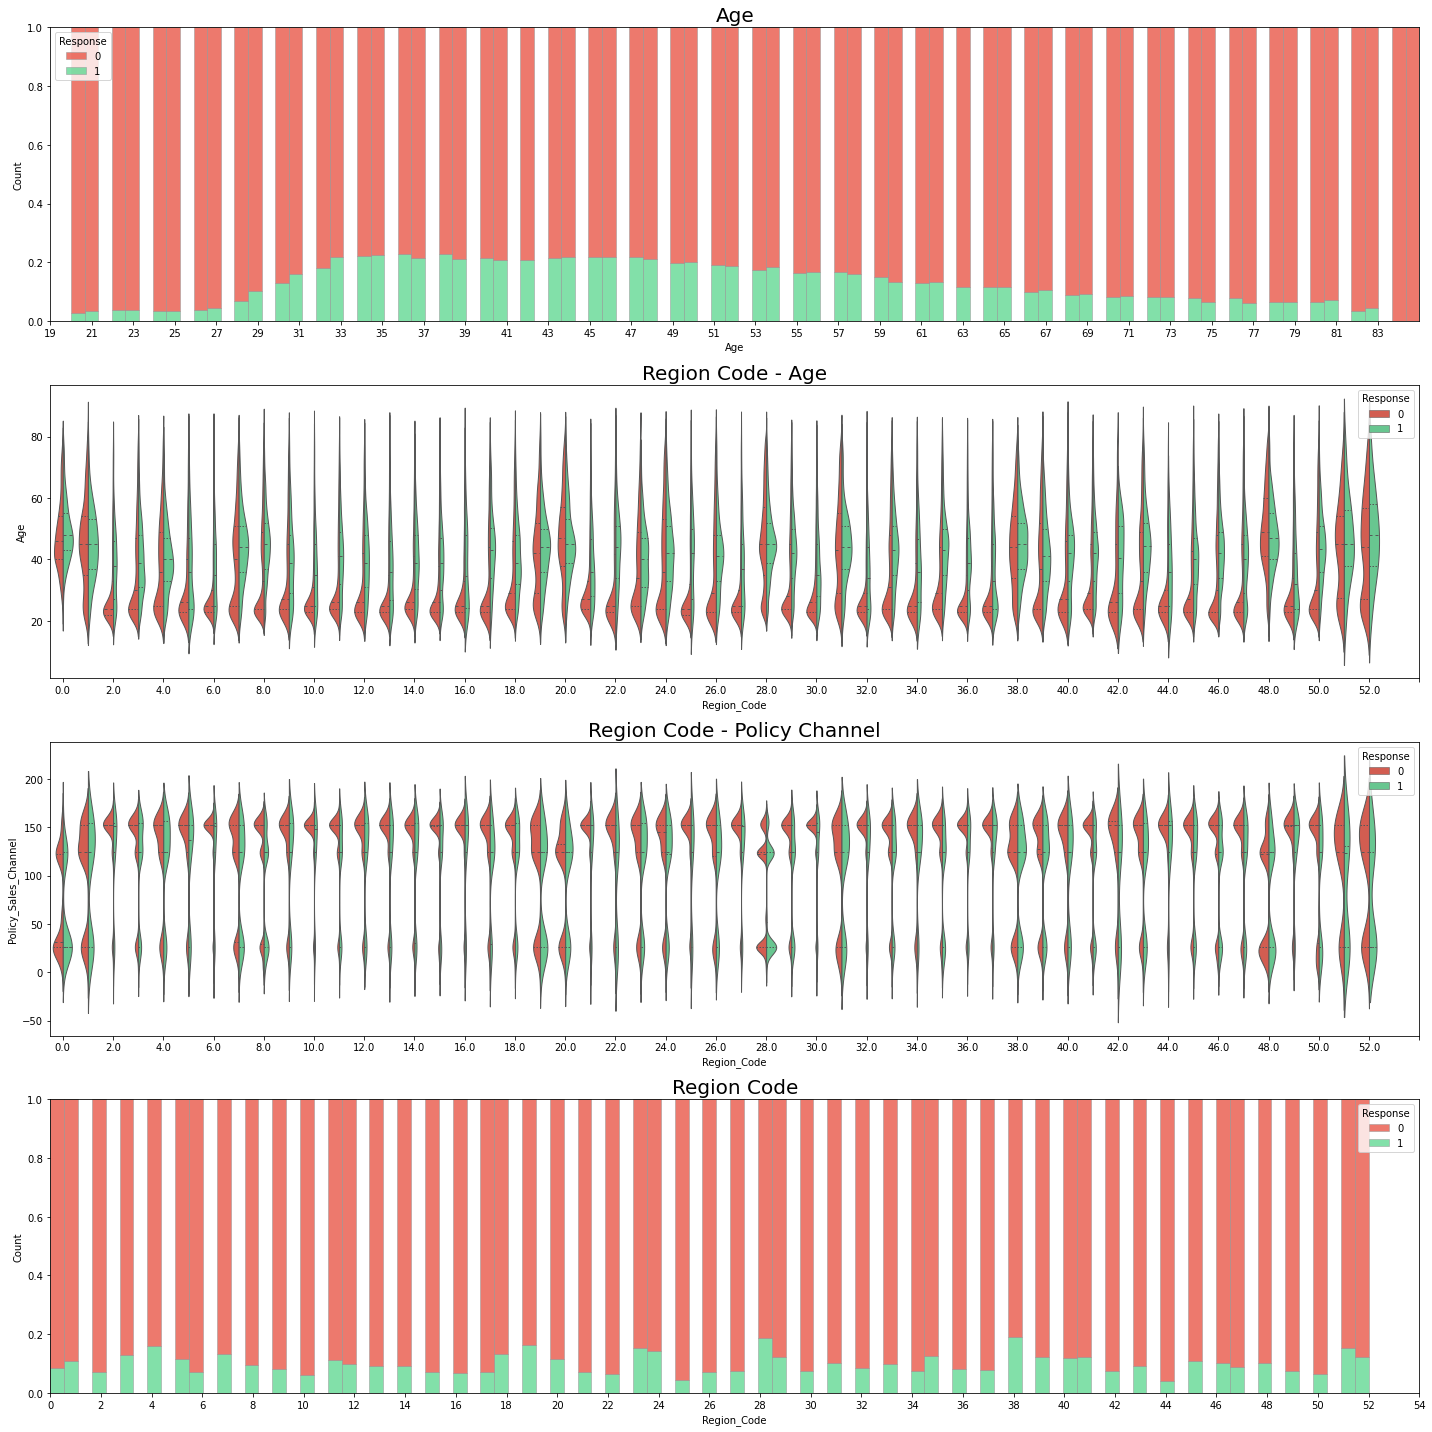

In [13]:
fig, ax = plt.subplots(4, 1, figsize = (20, 20))

# Age vs Response Plot
g_age_response = sns.histplot(
    data = train,
    x = 'Age', hue = 'Response',
    multiple = 'fill',
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    edgecolor = '.6',
    linewidth = .5,
    ax = ax[0]
)
# x ticks
ax[0].set_xticks(np.arange(19, 85, 2))

# Region vs Age vs Response Plot
g_region_ = sns.violinplot(
    data = train,     
    x = 'Region_Code', y = 'Age', hue = 'Response', 
    split = True, inner = 'quart', linewidth = 1,
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    edgecolor = '.6',
    ax = ax[1]
)
#x ticks
ax[1].set_xticks(np.arange(0, 55, 2))

# Region vs Policy Sales Channel vs Response Plot
g_region_policy_response = sns.violinplot(
    data = train,     
    x = 'Region_Code', y = 'Policy_Sales_Channel', hue = 'Response', 
    split = True, inner = 'quartile', linewidth = 1,
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    edgecolor = '.6',
    ax = ax[2]
)
#x ticks
ax[2].set_xticks(np.arange(0, 55, 2))

# Region vs Response
g_region_response = sns.histplot(
    data = train,
    x = 'Region_Code', hue = 'Response',
    multiple = 'fill',
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    edgecolor = '.6',
    linewidth = .5,
    ax = ax[3]
)
#x ticks
ax[3].set_xticks(np.arange(0, 55, 2))

# Titles
ax[0].set_title('Age', fontsize=20)
ax[1].set_title('Region Code - Age', fontsize=20)
ax[2].set_title('Region Code - Policy Channel', fontsize=20)
ax[3].set_title('Region Code', fontsize=20)

fig.tight_layout() # Plots fit the fig area
plt.show()
plt.close()

En estos gráficos observamos que:

- La franja de edad entre 33 - 57 años encontramos la mayoría de respuestas positivas a nuestra oferta
- Aunque tengamos respuestas positivas entre los 19 y los 27 años, la proporción de respuestas afirmativas es más baja que en las otras edades
- Los canales de comunicación cerca del 150 y parecen recibir una proporción muy mala de respuestas afirmativas
- No encontramos ningún patrón relevante en cuanto a la región del cliente

#### Analizamos la influencia de *Vintage* y *Anual_Premium* sobre la decisión de los clientes

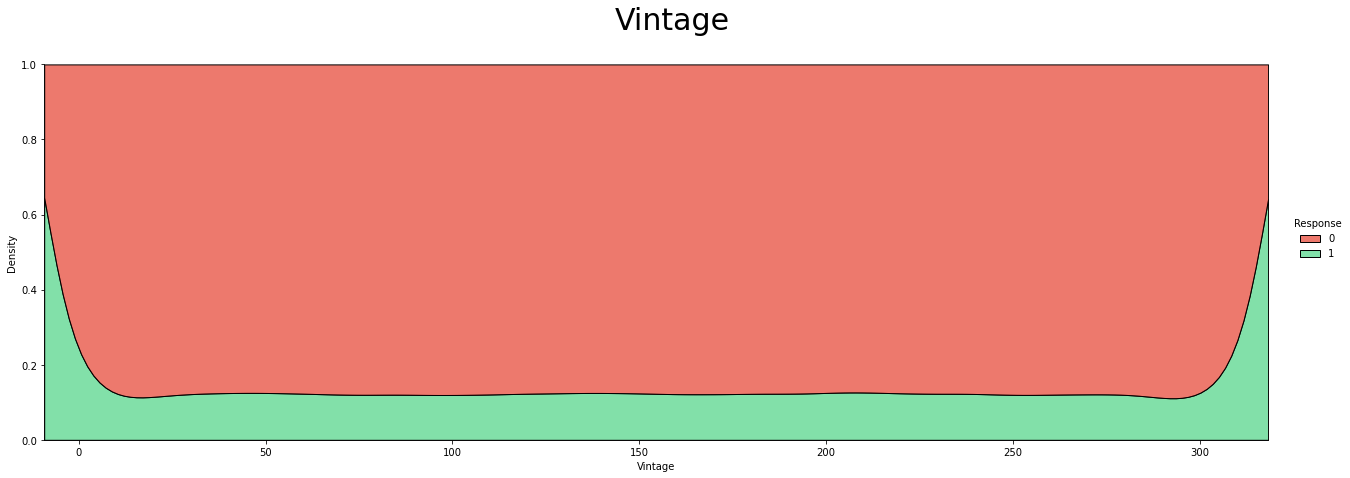

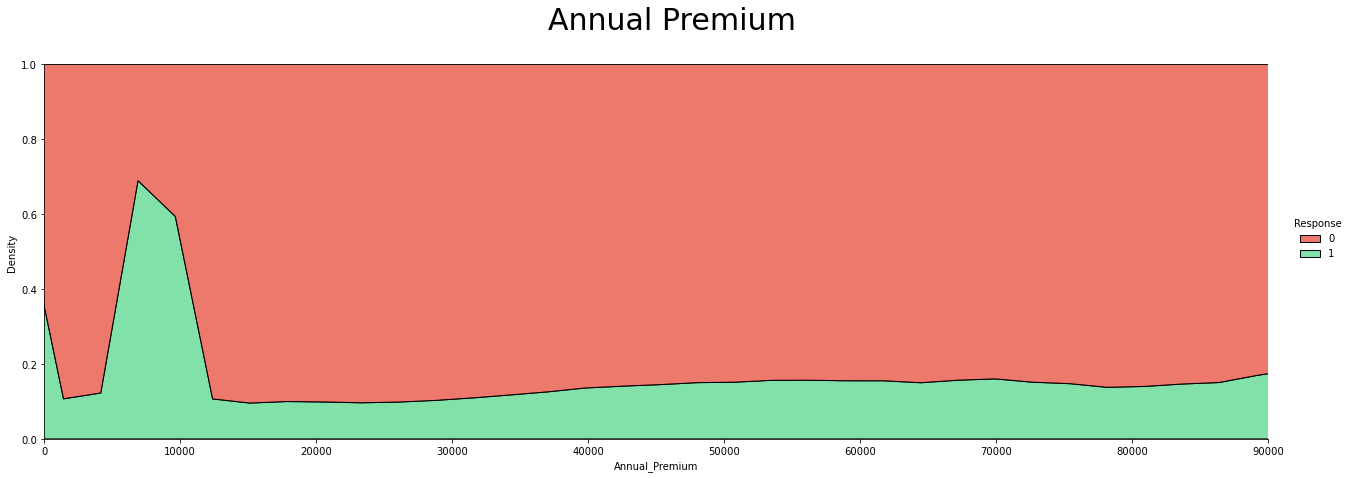

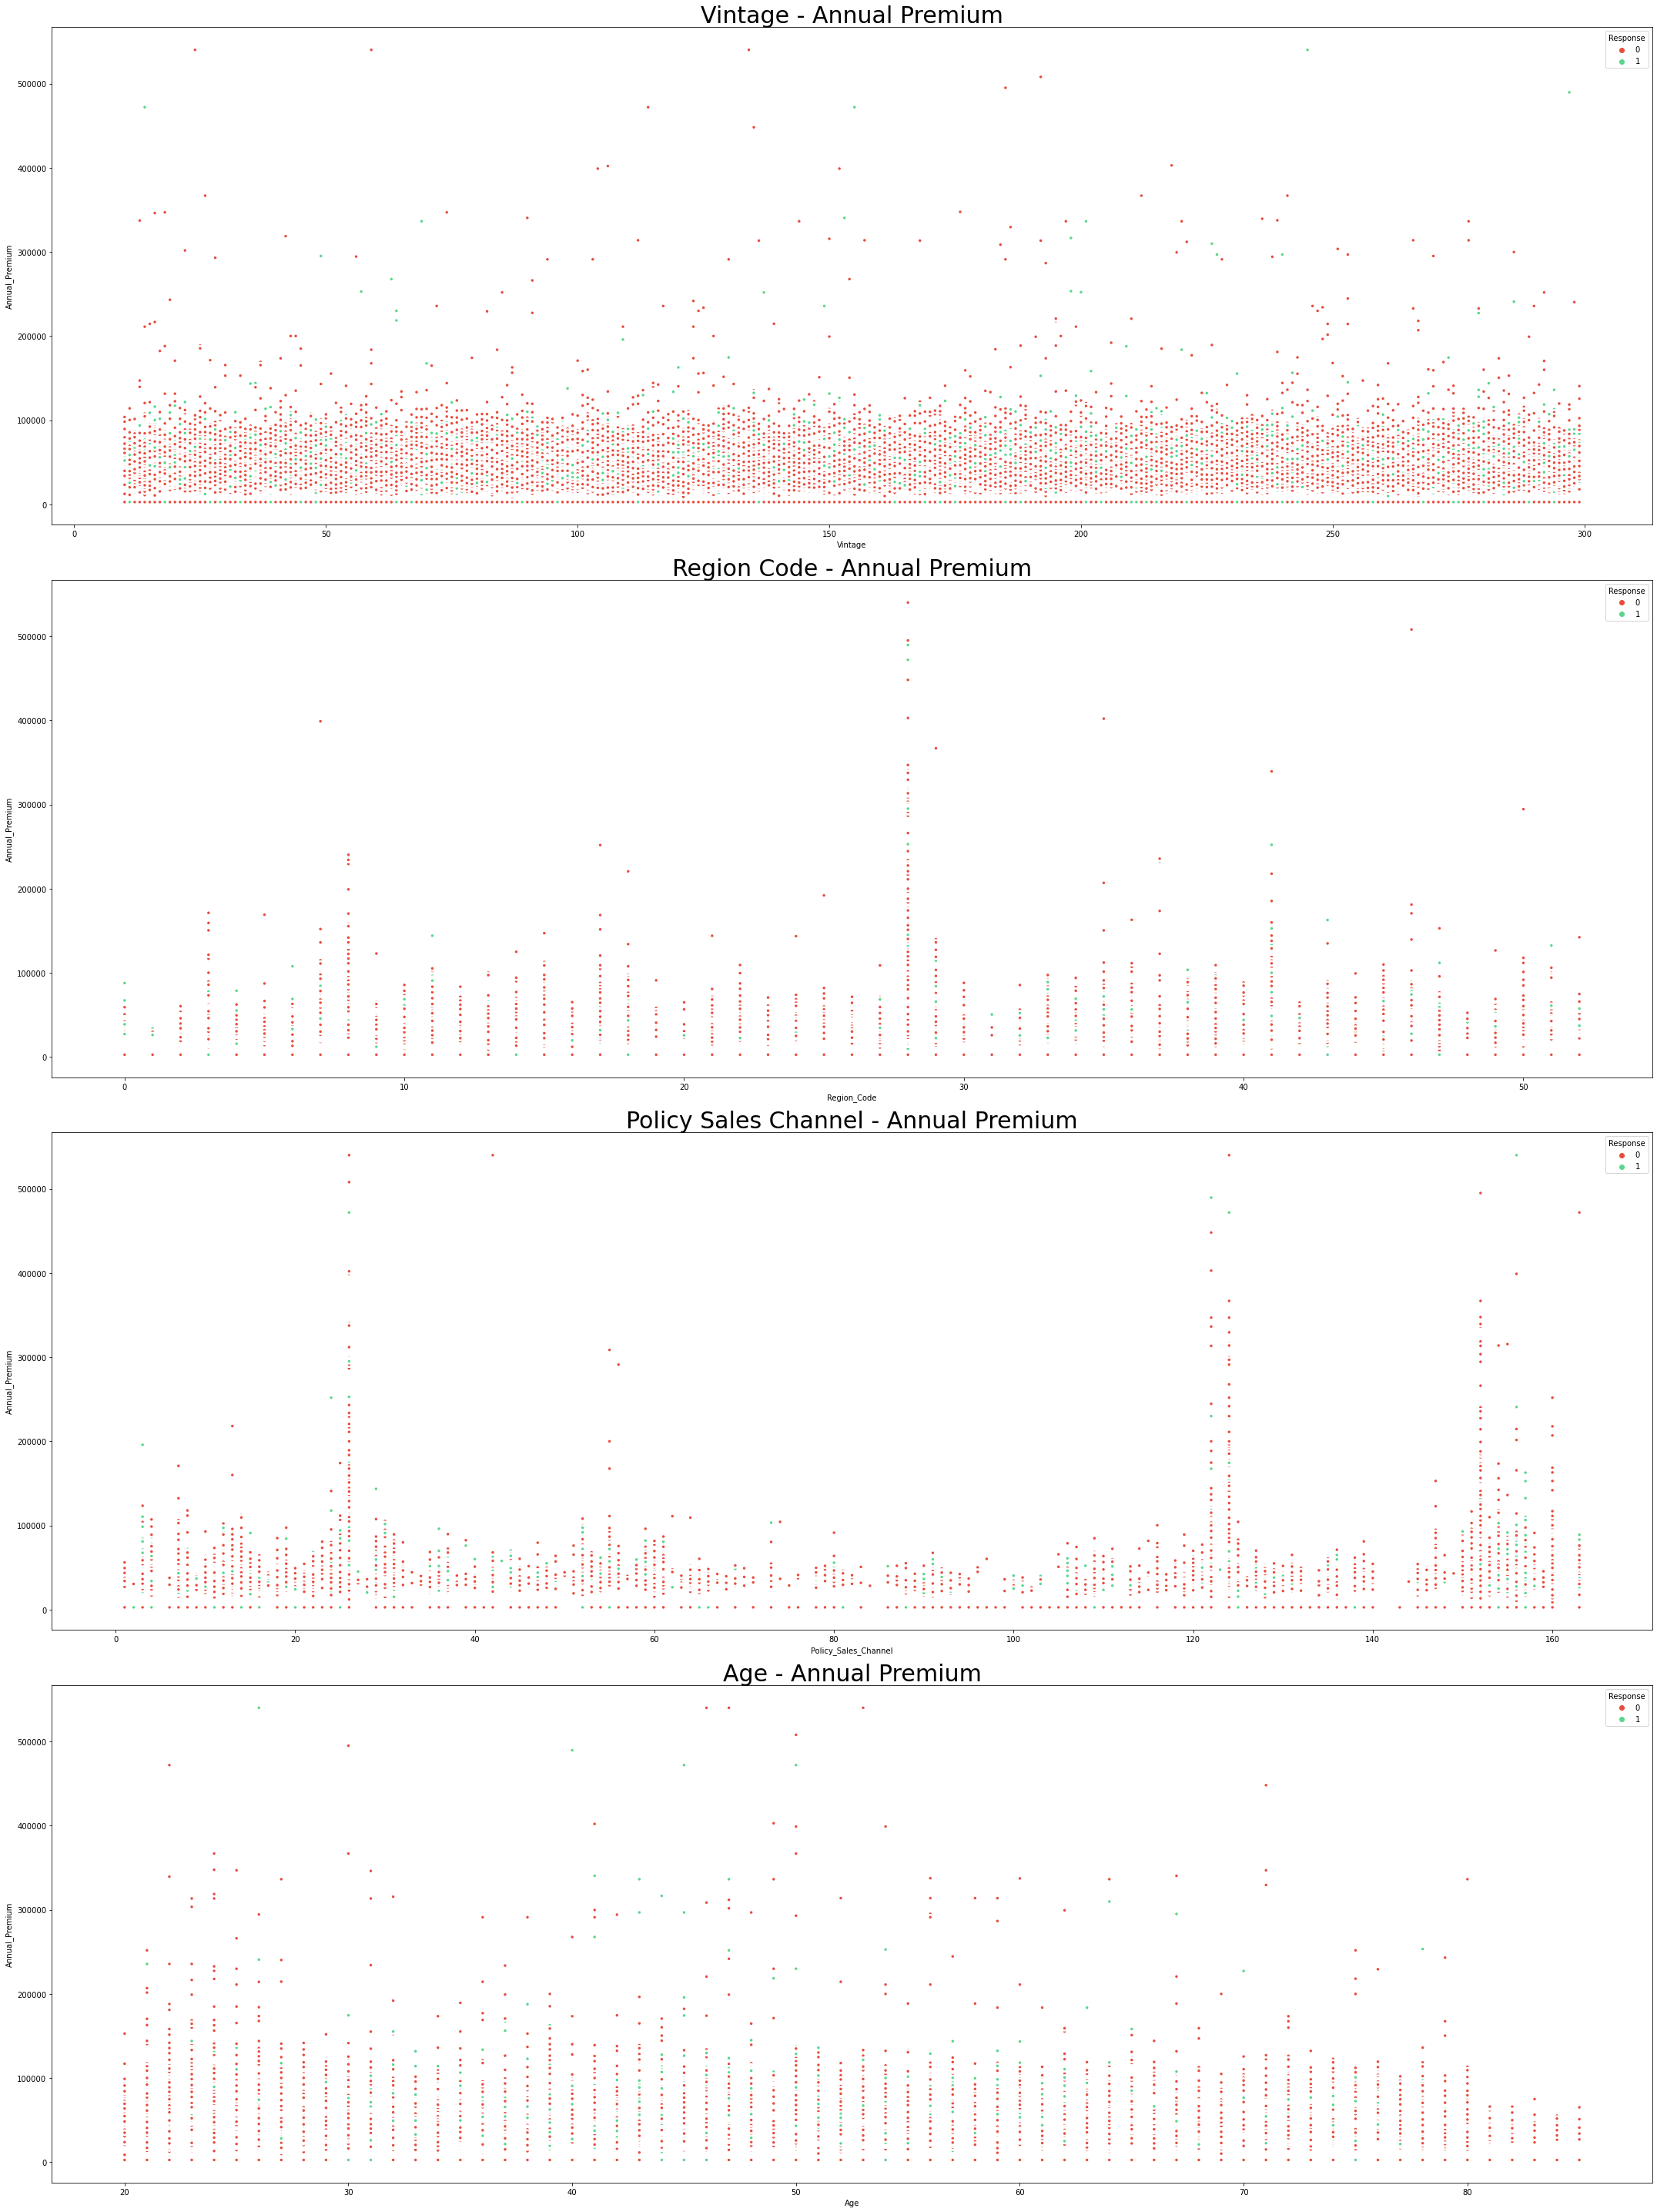

In [14]:
# Vintage vs Response Plot
g_vintage = sns.displot(
    data = train,
    x = 'Vintage', hue = 'Response',
    kind=  'kde', height=6, aspect=3,
    multiple = 'fill',
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
)
g_vintage.fig.suptitle('Vintage', size = '30', y = 1.1)

# Annual Premium vs Response
g_annual_premium = sns.displot(
    data=train,
    x = 'Annual_Premium', hue = 'Response',
    kind = 'kde', height=6, aspect=3,
    multiple = 'fill',
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
)
# Title, xticks, xlimit (nonuniform distribution)
g_annual_premium.fig.suptitle('Annual Premium', size = '30', y = 1.1)
g_annual_premium.set(xticks=np.arange(0, 100000, 10000))
g_annual_premium.set(xlim=(0,90000))

# Scatter plots: Annual Premium vs (Vintage or Region or Policy Sales Channel or Age)
fig, ax = plt.subplots(4, 1, figsize=(30, 40))

g_vint_premium = sns.scatterplot(
    data = train, x = 'Vintage', y = 'Annual_Premium', hue = 'Response',
    ci = None,
    linewidth=2.5,
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    ax=ax[0])
ax[0].set_title('Vintage - Annual Premium', fontsize = 30)

g_region_premium = sns.scatterplot(
    data = train, x = 'Region_Code', y = 'Annual_Premium', hue = 'Response',
    ci = None,
    linewidth=2.5,
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    ax=ax[1])
ax[1].set_title('Region Code - Annual Premium', fontsize = 30)

g_pol_premium = sns.scatterplot(
    data = train, x = 'Policy_Sales_Channel', y = 'Annual_Premium', hue = 'Response',
    ci = None,
    linewidth=2.5,
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    ax=ax[2])
ax[2].set_title('Policy Sales Channel - Annual Premium', fontsize = 30)

g_age_premium = sns.scatterplot(
    data = train, x = 'Age', y = 'Annual_Premium', hue = 'Response',
    ci = None,
    linewidth=2.5,
    palette = sns.color_palette(['#E74C3C', '#58D68D']),
    ax=ax[3])
ax[3].set_title('Age - Annual Premium', fontsize = 30)

fig.tight_layout() # Plots fit the fig area
plt.show()
plt.close()


Recibimos respuestas afirmativas en los clientes más nuevos y los más antiguos.

La distribución de **annual premium** pudimos ver que no era uniforme. A pesar de esto podemos ver una clara respuesta afirmativa alrededor de los 9000 puntos. Serían necesarios más datos para darle un valor importante a esta gráfica.

Observamos que la aseguradora no ofrece mejoras en annual premium con respecto a la edad, medio de comunación, región o a los mas vintage. Sería interesante ofrecer algún tipo de oferta, por lo menos sobre los clientes mas antiguos.

## Procesado y limpieza del Dataset

### Valores categóricos

Convertimos los valores categóricos en valores booleanos.

In [18]:
# Generate boolean values for categorical columns (train set & test set)
le = LabelEncoder()
x_train = pd.get_dummies(x_train, columns=['Gender', 'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'], prefix=['Gender', 'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'])
x_train['Vehicle_Damage'] = le.fit_transform(x_train['Vehicle_Damage']) # Yes -> 1 | No -> 0

x_test = pd.get_dummies(x_test, columns=['Gender', 'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'], prefix=['Gender', 'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'])
x_test['Vehicle_Damage'] = le.fit_transform(x_test['Vehicle_Damage']) # Yes -> 1 | No -> 0

# Columns not ordered
display(x_train)
display(x_test)

# Reordering columns so categorical data are the last columns
cols = list(x_train.columns) # list of columns names
cols = cols[0:1] + cols[4:6] + cols[1:4] + cols[4:] # Reordering
x_train = x_train[cols] # Copy

# Get missing columns in the training test
missing_cols = set(x_train.columns) - set(x_test.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test[c] = 0

# Ensure test-set columns follows same order than in train-set and copy
x_test = x_test[x_train.columns]

# Columns ordered
display(x_train)
display(x_test)

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
215357,31,1,0,1,27280.0,204,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
262812,43,1,1,0,2630.0,147,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
291557,25,1,1,1,2630.0,95,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
197937,53,1,0,1,45919.0,114,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
259434,26,1,1,0,55147.0,113,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,27,1,1,0,33223.0,220,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
358083,53,1,0,1,40971.0,131,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
152315,22,1,1,0,30400.0,118,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
117952,56,1,0,1,34849.0,229,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
220145,24,1,1,0,38744.0,267,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
194704,41,1,0,1,24929.0,156,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
203625,72,1,0,1,113486.0,70,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
218048,43,1,0,1,2630.0,209,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
230458,25,1,1,1,62383.0,20,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173172,62,1,0,1,32336.0,128,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
25252,23,1,1,0,2630.0,144,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
50493,26,1,1,0,39125.0,240,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
326182,49,1,0,1,37143.0,72,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


,Age,Annual_Premium,Vintage,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
215357,31,27280.0,204,1,0,1,27280.0,204,0,1,...,0,0,0,0,0,0,0,0,0,0
262812,43,2630.0,147,1,1,0,2630.0,147,0,1,...,0,0,0,0,0,1,0,0,0,0
291557,25,2630.0,95,1,1,1,2630.0,95,0,1,...,0,0,0,1,0,0,0,0,0,0
197937,53,45919.0,114,1,0,1,45919.0,114,0,1,...,0,0,0,0,0,0,0,0,0,0
259434,26,55147.0,113,1,1,0,55147.0,113,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,27,33223.0,220,1,1,0,33223.0,220,0,1,...,0,0,0,0,0,0,0,0,0,0
358083,53,40971.0,131,1,0,1,40971.0,131,1,0,...,0,0,0,1,0,0,0,0,0,0
152315,22,30400.0,118,1,1,0,30400.0,118,0,1,...,0,0,1,0,0,0,0,0,0,0
117952,56,34849.0,229,1,0,1,34849.0,229,1,0,...,1,0,0,0,0,0,0,0,0,0


,Age,Annual_Premium,Vintage,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
220145,24,38744.0,267,1,1,0,38744.0,267,1,0,...,0,0,0,0,0,0,0,0,0,0
194704,41,24929.0,156,1,0,1,24929.0,156,1,0,...,0,0,0,0,0,0,0,0,0,0
203625,72,113486.0,70,1,0,1,113486.0,70,1,0,...,0,0,0,0,0,0,0,0,0,0
218048,43,2630.0,209,1,0,1,2630.0,209,0,1,...,0,0,0,0,1,0,0,0,0,0
230458,25,62383.0,20,1,1,1,62383.0,20,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173172,62,32336.0,128,1,0,1,32336.0,128,0,1,...,0,0,0,0,0,0,0,0,0,0
25252,23,2630.0,144,1,1,0,2630.0,144,0,1,...,0,0,0,0,0,0,0,0,0,0
50493,26,39125.0,240,1,1,0,39125.0,240,1,0,...,0,0,0,0,0,0,0,0,0,0
326182,49,37143.0,72,1,0,1,37143.0,72,0,1,...,0,0,0,0,0,0,0,0,0,0


### Estandarización

Estandarizamos los valores continuos para no confudir los futuros análisis

In [19]:
# Continous variables standarization
sc = StandardScaler()

# Continous variables only
x_train.iloc[:, :3] = sc.fit_transform(x_train.iloc[:, :3])
x_test.iloc[:, :3] = sc.fit_transform(x_test.iloc[:, :3])

display(x_train)

,Age,Annual_Premium,Vintage,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Gender_Female,Gender_Male,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
215357,-0.503537,-0.191750,0.594647,1,0,1,27280.0,204,0,1,...,0,0,0,0,0,0,0,0,0,0
262812,0.269987,-1.627038,-0.086343,1,1,0,2630.0,147,0,1,...,0,0,0,0,0,1,0,0,0,0
291557,-0.890300,-1.627038,-0.707598,1,1,1,2630.0,95,0,1,...,0,0,0,1,0,0,0,0,0,0
197937,0.914591,0.893537,-0.480601,1,0,1,45919.0,114,0,1,...,0,0,0,0,0,0,0,0,0,0
259434,-0.825839,1.430853,-0.492548,1,1,0,55147.0,113,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,-0.761379,0.154291,0.785802,1,1,0,33223.0,220,0,1,...,0,0,0,0,0,0,0,0,0,0
358083,0.914591,0.605431,-0.277499,1,0,1,40971.0,131,1,0,...,0,0,0,1,0,0,0,0,0,0
152315,-1.083681,-0.010083,-0.432812,1,1,0,30400.0,118,0,1,...,0,0,1,0,0,0,0,0,0,0
117952,1.107972,0.248968,0.893327,1,0,1,34849.0,229,1,0,...,1,0,0,0,0,0,0,0,0,0


## Análisis predictivo

Procedemos a la obtención del mejor modelo para predecir la respuesta de los clientes.

Vamos a fijarnos sobretodo en lo que nos pide nuestro cliente. La aseguradora quiere contactar con los clientes que nuestro modelo de como cliente interesado. Por ello, a parte de medir la precisión general del modelo, debemos medir la precisión de aciertos positivos con respecto a los verdaderamente positivos. Esta última medida supondrá el coste que tendrá la empresa.

Se suprime el modelo de maquina vectorial por exceso de tiempo de computación.

In [72]:
accuracy_1_scores = np.empty(5)
accuracy_total = np.empty(5)

### Análisis regresión logística

Analizamos el modelo de regresión logistica

#### Configuración del modelo

In [73]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=200) # Logistic Regression
logmodel.fit(x_train, y_train) # Training...
predictions_logmodel = logmodel.predict(x_test) # Prdictions over test set

#### Resultado

Accuracy:  0.8757489088889472

REPORT:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.25      0.00      0.01     14092

    accuracy                           0.88    114333
   macro avg       0.57      0.50      0.47    114333
weighted avg       0.80      0.88      0.82    114333

Actual 1 prediction rate:  0.2543103448275862


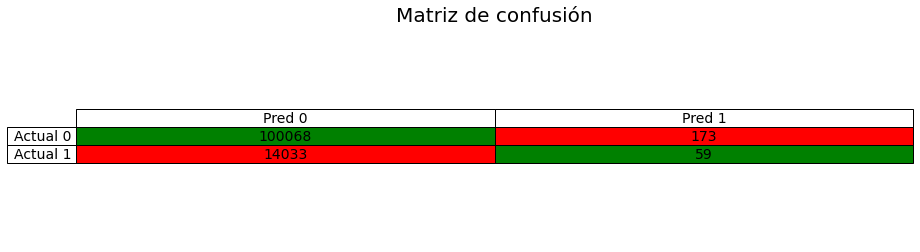

In [74]:
# Reports: confussion matrix & accuracy score
cm = confusion_matrix(y_test, predictions_logmodel)
log_model_acc = accuracy_score(predictions_logmodel, y_test)

print('Accuracy: ', log_model_acc)
print('\nREPORT:\n', classification_report(y_test, predictions_logmodel))

# Confussion matrix table
fig, ax =plt.subplots(1, figsize=(10,4))

labels_pred =['Pred 0', 'Pred 1']
labels_result =['Actual 0', 'Actual 1']
ax.axis('tight')
ax.axis('off')
colors = [['g', 'r'],[ 'r', 'g']]

conf_matrix_table = ax.table(   cellText = cm, 
                                colLabels = labels_pred,
                                rowLabels = labels_result,    
                                loc = 'center',   
                                cellColours = colors, 
                                cellLoc = 'center')

ax.set_title('Matriz de confusión', fontsize = 20)
conf_matrix_table.auto_set_font_size(False)
conf_matrix_table.set_fontsize(8)
conf_matrix_table.set_fontsize(14)
conf_matrix_table.scale(1.5, 1.5)

# Pred 1 rate
pred_1_rate = cm[1, 1] / (cm[0, 1] + cm[1, 1])

accuracy_1_scores[0] = pred_1_rate
accuracy_total[0] = log_model_acc

print('Actual 1 prediction rate: ', pred_1_rate)


- Conseguimos muy buen resultado de precision. 
- La mayoría de fallos se encuentran en falsos negativos. 
- El inconveniente de este modelo es que nos ofrece muy pocos aciertos positivos absolutos (futuros clientes). Aunque el ratio es bueno (menos coste).

### Análisis kNN

Analizamos el modelo de kNN (k - Vecinos más cercanos)

#### Configuración del modelo

In [247]:
knn_model = KNeighborsClassifier(metric='minkowski', p=2, n_jobs=-1) # kNN model
knn_model.fit(x_train, y_train) # Training...
predictions_knn_model = knn_model.predict(x_test) # Predictions over test set

#### Resultado

Precisión del modelo:  0.862183271671346

REPORT:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93    100241
           1       0.20      0.04      0.07     14092

    accuracy                           0.86    114333
   macro avg       0.54      0.51      0.50    114333
weighted avg       0.79      0.86      0.82    114333



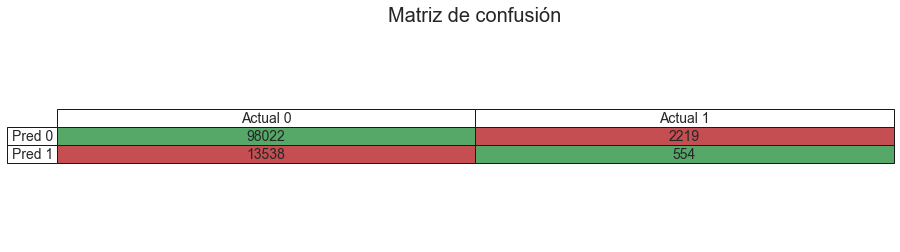

In [250]:
# Reports: confussion matrix & accuracy score
cm = confusion_matrix(y_test, predictions_knn_model)
knn_model_acc = accuracy_score(predictions_knn_model, y_test)

print('Accuracy: ', knn_model_acc)
print('\nREPORT:\n', classification_report(y_test, predictions_knn_model))

# Confussion matrix table
fig, ax =plt.subplots(1, figsize=(10,4))

labels_pred =['Pred 0', 'Pred 1']
labels_result =['Actual 0', 'Actual 1']
ax.axis('tight')
ax.axis('off')
colors = [['g', 'r'],[ 'r', 'g']]

conf_matrix_table = ax.table(   cellText = cm, 
                                    colLabels = labels_pred,
                                    rowLabels = labels_result,    
                                    loc = 'center',   
                                    cellColours = colors, 
                                    cellLoc = 'center')


ax.set_title('Matriz de confusión', fontsize = 20)
conf_matrix_table.auto_set_font_size(False)
conf_matrix_table.set_fontsize(8)
conf_matrix_table.set_fontsize(14)
conf_matrix_table.scale(1.5, 1.5)

# Pred 1 rate
pred_1_rate = cm[1, 1] / (cm[0, 1] + cm[1, 1])

accuracy_1_scores[1] = pred_1_rate
accuracy_total[1] = knn_model_acc

print('Actual 1 prediction rate: ', pred_1_rate)

- Ligero descenso en la precisión.
- Este modelo, aunque tiene menos precisión (más esfuerzo) nos ofrece más aciertos positivos absoultos (futuros clientes).

### Análisis Naive Bayes

#### Configuración del modelo

In [75]:
nb_model = GaussianNB() # Naive Bayes model
nb_model.fit(x_train, y_train) # Training...
predictions_nb_model = nb_model.predict(x_test) # Predictions over test set

#### Resultado

Accuracy:  0.7594045463689398

REPORT:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85    100241
           1       0.28      0.63      0.39     14092

    accuracy                           0.76    114333
   macro avg       0.61      0.70      0.62    114333
weighted avg       0.86      0.76      0.79    114333

Actual 1 prediction rate:  0.2847516365036581


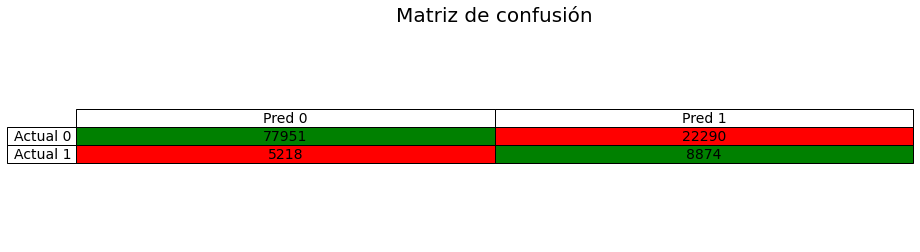

In [76]:
# Reports: confussion matrix & accuracy score
cm = confusion_matrix(y_test, predictions_nb_model)
nb_model_acc = accuracy_score(predictions_nb_model, y_test)

print('Accuracy: ', nb_model_acc)
print('\nREPORT:\n', classification_report(y_test, predictions_nb_model))

# Confussion matrix table
fig, ax =plt.subplots(1, figsize=(10,4))

labels_pred =['Pred 0', 'Pred 1']
labels_result =['Actual 0', 'Actual 1']
ax.axis('tight')
ax.axis('off')
colors = [['g', 'r'],[ 'r', 'g']]

conf_matrix_table = ax.table(   cellText = cm, 
                                    colLabels = labels_pred,
                                    rowLabels = labels_result,
                                    loc = 'center',   
                                    cellColours = colors, 
                                    cellLoc = 'center')


ax.set_title('Matriz de confusión', fontsize = 20)
conf_matrix_table.auto_set_font_size(False)
conf_matrix_table.set_fontsize(8)
conf_matrix_table.set_fontsize(14)
conf_matrix_table.scale(1.5, 1.5)

# Pred 1 rate
pred_1_rate = cm[1, 1] / (cm[0, 1] + cm[1, 1])

accuracy_1_scores[2] = pred_1_rate
accuracy_total[2] = nb_model_acc

print('Actual 1 prediction rate: ', pred_1_rate)

- Modelo más rapido pero con menos precisión.
- Ofrece muchos más aciertos positivos absoultos y buen ratio.

### Análisis Decision Tree

#### Configuración del modelo

### Análisis Random Forest

In [247]:
dtc_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # Decision Tree Model
dtc_model.fit(x_train, y_train) # Training...
predictions_dtc_model = dtc_model.predict(x_test) # Predictions over test set

#### Resultado

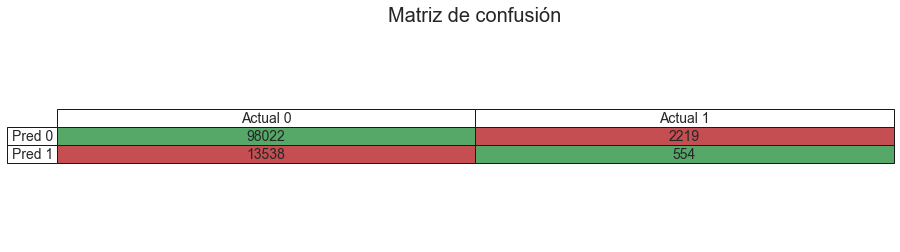

In [250]:
# Reports: confussion matrix & accuracy score
cm = confusion_matrix(y_test, predictions_dtc_model)
dtc_model_acc = accuracy_score(predictions_dtc_model, y_test)

print('Accuracy: ', dtc_model_acc)
print('\nREPORT:\n', classification_report(y_test, predictions_dtc_model))

# Confussion matrix table
fig, ax =plt.subplots(1, figsize=(10,4))

labels_pred =['Pred 0', 'Pred 1']
labels_result =['Actual 0', 'Actual 1']
ax.axis('tight')
ax.axis('off')
colors = [['g', 'r'],[ 'r', 'g']]

conf_matrix_table = ax.table(   cellText = cm, 
                                colLabels = labels_pred,
                                rowLabels = labels_result,    
                                loc = 'center',   
                                cellColours = colors, 
                                cellLoc = 'center')


ax.set_title('Confussion Matrix', fontsize = 20)
conf_matrix_table.auto_set_font_size(False)
conf_matrix_table.set_fontsize(8)
conf_matrix_table.set_fontsize(14)
conf_matrix_table.scale(1.5, 1.5)

# Pred 1 rate
pred_1_rate = cm[1, 1] / (cm[0, 1] + cm[1, 1])

accuracy_1_scores[3] = pred_1_rate
accuracy_total[3] = dtc_model_acc

print('Actual 1 prediction rate: ', pred_1_rate)

- Menos precisión que kNN. 
- Mucho más rápido que kNN.
- Ratio de aciertos positivos más alto y por tanto menos esfuerzo.

#### Configuración del modelo

In [79]:
rfc_model = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=0) # Random Forest Model
rfc_model.fit(x_train, y_train) # Training...
predictions_rfc_model = rfc_model.predict(x_test) # Predictions over test set

#### Resultado

Accuracy:  0.8630841489333788

REPORT:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93    100241
           1       0.35      0.12      0.18     14092

    accuracy                           0.86    114333
   macro avg       0.62      0.55      0.55    114333
weighted avg       0.82      0.86      0.83    114333

Actual 1 prediction rate:  0.3463203463203463


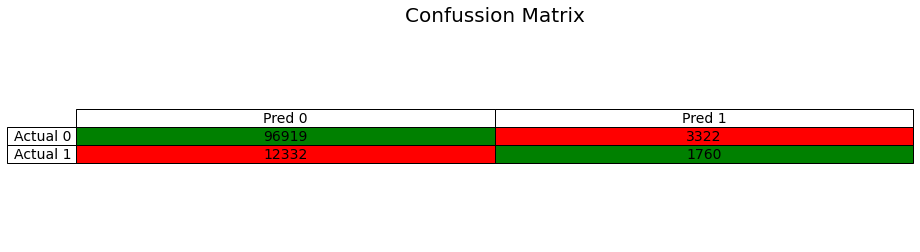

In [80]:
# Reports: confussion matrix & accuracy score
cm = confusion_matrix(y_test, predictions_rfc_model)
rfc_model_acc = accuracy_score(predictions_rfc_model, y_test)

print('Accuracy: ', rfc_model_acc)
print('\nREPORT:\n', classification_report(y_test, predictions_rfc_model))

# Confussion matrix table
fig, ax =plt.subplots(1, figsize=(10,4))

labels_pred =['Pred 0', 'Pred 1']
labels_result =['Actual 0', 'Actual 1']
ax.axis('tight')
ax.axis('off')
colors = [['g', 'r'],[ 'r', 'g']]

conf_matrix_table = ax.table(   cellText = cm, 
                                    colLabels = labels_pred,
                                    rowLabels = labels_result,  
                                    loc = 'center',   
                                    cellColours = colors, 
                                    cellLoc = 'center')


ax.set_title('Confussion Matrix', fontsize = 20)
conf_matrix_table.auto_set_font_size(False)
conf_matrix_table.set_fontsize(8)
conf_matrix_table.set_fontsize(14)
conf_matrix_table.scale(1.5, 1.5)

# Pred 1 rate
pred_1_rate = cm[1, 1] / (cm[0, 1] + cm[1, 1])

accuracy_1_scores[4] = pred_1_rate
accuracy_total[4] = rfc_model_acc

print('Actual 1 prediction rate: ', pred_1_rate)

- Precisión prácticamente igual que la regresión logística.
- La precisión sobre los aciertos positivos es mucho mayor que los demás modelos.

### Análisis de los modelos

Visualizamos la precisíon que han tenido los modelos

,Model,Accuracy,Actual 1 Accuracy
0,Log Model,0.875749,2.543103e-01
1,kNN,0.000000,2.964394e-323
2,Naive Bayes,0.759405,2.847516e-01
3,Decission Tree,0.824644,2.933750e-01
4,Random Forest,0.863084,3.463203e-01


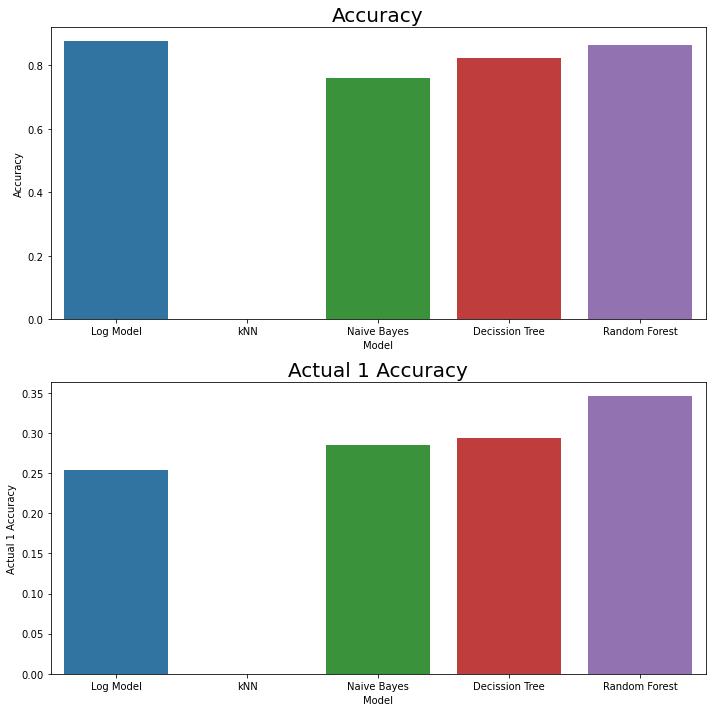

In [112]:
# Dataframe of accuracy values
acc_data = pd.DataFrame({'Model': ['Log Model', 'kNN', 'Naive Bayes', 'Decission Tree', 'Random Forest'], 'Accuracy':accuracy_total, 'Actual 1 Accuracy':accuracy_1_scores})
display(acc_data)

# Plots
fig, ax =plt.subplots(2, figsize=(10,10))

sns.barplot(
    data=acc_data, x='Model', y='Accuracy', 
    estimator=sum, ci=None, 
    ax = ax[0])

ax[0].set_title('Accuracy', fontsize = '20')

sns.barplot(
    data=acc_data, x='Model', y='Actual 1 Accuracy', 
    estimator=sum, ci=None, 
    ax = ax[1])


ax[1].set_title('Actual 1 Accuracy', fontsize = '20')

plt.tight_layout()
plt.show()
plt.close()


Podemos ver como el mejor modelo de los que hemos creado es el **Random Forest**